<a href="https://colab.research.google.com/github/bchaoss/Numerical-Optimization/blob/main/Code/02Steepest_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The Steepest Descent Method
> "The steepest descent method is a line search method that moves along $ d_k = -\nabla{f_k}$ at every step."

In the steepest descent method, the direction that results in the fastest decrease in the function value is chosen at each iteration, which is the negative direction of the function gradient. The following code demonstrates the use of the steepest descent method to solve the problem of finding the minimum point of a positive definite quadratic function. The step size search is performed using exact line search, considering two different cases of positive definite matrices for comparison.

$$min{f(x)} = \frac{1}{2} x^T G x + b^T x + c.$$

Where,

$$G_1 = \begin{bmatrix}
21 & 4 \\
4 & 15 \\
\end{bmatrix}, \
G_2 = \begin{bmatrix}
21 & 4 \\
4 & 1 \\
\end{bmatrix}
$$

In [1]:
import numpy as np
from numpy import array, linspace, dot
from numpy.linalg import norm
import matplotlib.pyplot as plt

eps = 1e-5

# quadratic function
def f(G, b, c, x1, x2):
    # x = array([x1, x2])
    # return 0.5 * dot(x.T, dot(G, x)) + dot(b, x) + c
    return 0.5*(G[0, 0]*x1**2 + 2*G[0, 1]*x1*x2+G[1, 1]*x2**2)+ b[0] * x1 + b[1] * x2 + c

# gradient of the quadratic function
def grad_f(G, b, x):
    return dot(G, x) + b

In [2]:
# the steepest descent method of quadratic function
def steepest_descent(grad_f, G, b, x0, alpha='exact', iterMax=100):
    """
    Perform the steepest descent optimization method to find the minimum point of a function. (quadratic function for now)

    Parameters:
    grad_f (function): The function that calculates the gradient of the objective function.
    G (array-like): The coefficient matrix of the function.
    b (array-like): The coefficient vector of the linear term of the function.
    x0 (array-like): The initial point for the optimization.
    alpha (str, optional): The method for determining the step size. Defaults to 'exact'. (waiting to implemente other inexact method)
    iterMax (int, optional): The maximum number of iterations. Defaults to 100.

    Return:
    path (list): The list of optimization points history during the steepest descent optimization. (It can be used to assist in plotting the trajectory.)
    """

    x = x0
    path = []
    print("The iteration process:")

    for iter in range(iterMax):
        g = grad_f(G, b, x)
        print(f"Iteration {iter}: {x}, |g|={norm(g)}")
        path.append(x)
        if norm(g) < eps:
            break
        d = - g # the negative direction of the gradient
        if alpha == 'exact':
            a = dot(-g.T, d) / dot(dot(d.T, G), d) # exact line search
        else:
            a = a # custom inexact line search method
        x = x + a * d

    print(f"The result is ({x[0]}, {x[1]})")
    return path

In [3]:
b = array([2, 3])
c = 10
x0 = array([-30, 100])

G1 = array([[21, 4], [4, 15]])
path1 = steepest_descent(grad_f, G1, b, x0)

The iteration process:
Iteration 0: [-30 100], |g|=1401.6679349974445
Iteration 1: [-13.56730783   0.3227488 ], |g|=285.4238502087325
Iteration 2: [-0.83873483  2.42116865], |g|=36.44801868335119
Iteration 3: [-0.41143029 -0.17077073], |g|=7.42196747555679
Iteration 4: [-0.08044514 -0.11620485], |g|=0.9477694629179956
Iteration 5: [-0.0693338  -0.18360387], |g|=0.19299578913233126
Iteration 6: [-0.06072709 -0.18218498], |g|=0.024645151843334673
Iteration 7: [-0.06043816 -0.18393758], |g|=0.005018531103172105
Iteration 8: [-0.06021436 -0.18390068], |g|=0.0006408557493623731
Iteration 9: [-0.06020684 -0.18394626], |g|=0.0001304984660379132
Iteration 10: [-0.06020102 -0.1839453 ], |g|=1.66643765920942e-05
Iteration 11: [-0.06020083 -0.18394648], |g|=3.393393263253158e-06
The result is (-0.060200829481802665, -0.18394648227023339)


In [4]:
G2 = array([[21, 4], [4, 1]])
path2 = steepest_descent(grad_f, G2, b, x0)

The iteration process:
Iteration 0: [-30 100], |g|=228.63289352147035
Iteration 1: [-19.38676944 100.79133737], |g|=26.317109691774924
Iteration 2: [-15.60461866  50.06602097], |g|=125.7810907287419
Iteration 3: [-9.76581001 50.50137074], |g|=14.478208760230551
Iteration 4: [-7.68508119 22.59512538], |g|=69.1977542742616
Iteration 5: [-4.4728937  22.83463059], |g|=7.9651045027306475
Iteration 6: [-3.32819253  7.48216785], |g|=38.06875237651937
Iteration 7: [-1.56102579  7.61393028], |g|=4.381957104644578
Iteration 8: [-0.93127493 -0.83214009], |g|=20.943308387737474
Iteration 9: [ 0.04092184 -0.75965174], |g|=2.4107088689623914
Iteration 10: [ 0.38737571 -5.40620949], |g|=11.521842425663888
Iteration 11: [ 0.92222425 -5.36633044], |g|=1.326237822988746
Iteration 12: [ 1.11282389 -7.92260785], |g|=6.338676317231525
Iteration 13: [ 1.40706778 -7.90066861], |g|=0.7296222226464671
Iteration 14: [ 1.51192509 -9.30699015], |g|=3.4871868552147443
Iteration 15: [ 1.6738017 -9.2949204], |g|=0.4

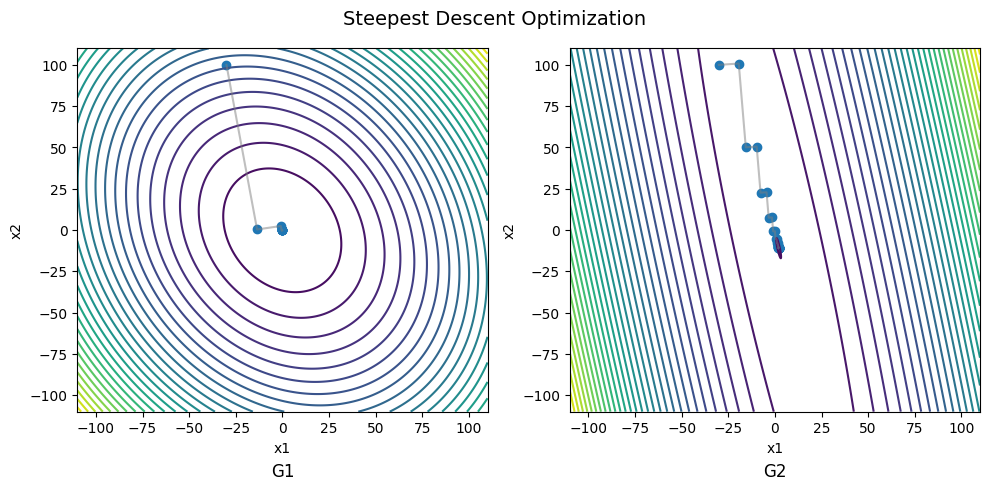

In [5]:
# visualization
x1 = linspace(-110, 110, 1000)
x2 = linspace(-110, 110, 1000)
X1, X2 = np.meshgrid(x1, x2)
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

ax1.contour(X1, X2, f(G1, b, c, X1, X2), levels=30)
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.scatter(*zip(*path1), marker='o')
ax1.plot(*zip(*path1), linestyle='-', color='gray', alpha=0.5)
ax1.set_title('G1', y=-0.2)

ax2.contour(X1, X2, f(G2, b, c, X1, X2), levels=30)
ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.scatter(*zip(*path2), marker='o')
ax2.plot(*zip(*path2), linestyle='-', color='gray', alpha=0.5)
ax2.set_title('G2', y=-0.2)

fig.suptitle('Steepest Descent Optimization', fontsize=14)
plt.tight_layout()
plt.show()

We can observe the difference in convergence speed between the two difference matrices. For positive definite quadratic functions, the convergence speed of the steepest descent method is related to the condition number of the matrix.(waiting...)